In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sp = pd.read_csv(r"C:\Users\mikec\OneDrive\Desktop\Future Pathway\Coursera coding\Download Data - INDEX_US_S&P US_SPX.csv")
print(sp.dtypes)
sp['M50'] = sp['Close'].rolling(50).mean()
sp['M200'] = sp['Close'].rolling(200).mean()
sp = sp.dropna()
sp.head

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


<bound method NDFrame.head of            Date     Open     High      Low    Close        M50        M200
199   2/25/2022  4298.38  4385.34  4286.83  4384.65  4369.6970  4037.43015
200   2/24/2022  4155.77  4294.73  4114.65  4288.70  4373.0042  4039.20175
201   2/23/2022  4324.93  4341.51  4221.51  4225.50  4374.5768  4040.51170
202   2/22/2022  4332.74  4362.12  4267.11  4304.76  4374.6686  4042.36590
203   2/18/2022  4384.57  4394.60  4327.22  4348.87  4378.1364  4044.40395
204   2/17/2022  4456.06  4456.06  4373.81  4380.26  4382.6340  4046.31105
205   2/16/2022  4455.75  4489.55  4429.68  4475.01  4389.4956  4048.32760
206   2/15/2022  4429.28  4472.77  4429.28  4471.07  4393.1670  4050.30010
207   2/14/2022  4412.61  4426.22  4364.84  4401.67  4397.5212  4051.90790
208   2/11/2022  4506.27  4526.33  4401.41  4418.64  4402.3900  4054.21295
209   2/10/2022  4553.24  4588.92  4484.31  4504.08  4406.5492  4056.91365
210    2/9/2022  4547.00  4590.03  4547.00  4587.18  4412.8572  4059.7

In [9]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

sp['Shares'] = [1 if sp.loc[ei, 'M50']>sp.loc[ei, 'M200'] else 0 for ei in sp.index]


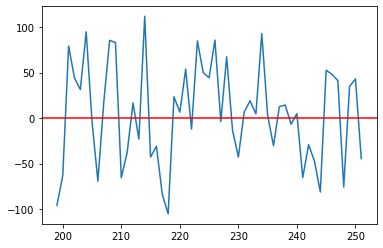

In [11]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
sp['Close1'] = sp['Close'].shift(-1)
sp['Profit'] = [sp.loc[ei, 'Close1'] - sp.loc[ei, 'Close'] if sp.loc[ei, 'Shares']==1 else 0 for ei in sp.index]
sp['Profit'].plot()
plt.axhline(y=0, color='red')

In [12]:
#Use .cumsum() to calculate the accumulated wealth over the period

sp['wealth'] = sp['Profit'].cumsum()
sp.tail()

,Date,Open,High,Low,Close,M50,M200,Shares,Close1,Profit,wealth
248,12/15/2021,4636.46,4712.60,4611.22,4709.85,4558.8054,4213.03570,1,4634.09,-75.76,249.44
249,12/14/2021,4642.99,4660.47,4606.52,4634.09,4563.7942,4218.27805,1,4668.97,34.88,284.32
250,12/13/2021,4710.30,4710.30,4667.60,4668.97,4571.3996,4223.42055,1,4712.02,43.05,327.37
251,12/10/2021,4687.64,4713.57,4670.24,4712.02,4581.1300,4228.38545,1,4667.45,-44.57,282.80
252,12/9/2021,4691.00,4695.26,4665.98,4667.45,4588.3838,4233.48625,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 282.8000000000002')

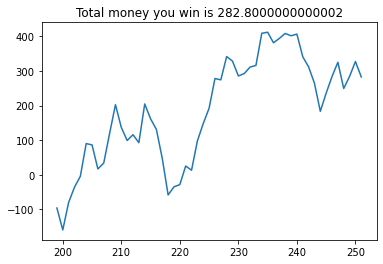

In [13]:
sp['wealth'].plot()
plt.title('Total money you win is {}'.format(sp.loc[sp.index[-2], 'wealth']))